In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import tensorflow as tf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob
from PIL import Image
import sys, os

Downloaded data set from kaggle onto D: (no space on C:)
I ran these in bash from DL location. Can be run in notebook if space on C: and downloaded directly from notebook

!mkdir data
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food

!mv training/0*.jpg data/train/nonfood
!mv training 1*.jpg data/train/food
!mv validation/0*.jpg data/train/nonfood
!mv validation/1*.jpg data/train/food

Data now loaded into Google Drive, works with Google Colab

In [4]:
train_path = r"/content/drive/My Drive/data/train"
valid_path = r"/content/drive/My Drive/data/test"

In [5]:
IMAGE_SIZE = [200,200]

In [6]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [7]:
folders = glob(train_path + '/*')
folders

['/content/drive/My Drive/data/train/food',
 '/content/drive/My Drive/data/train/nonfood']

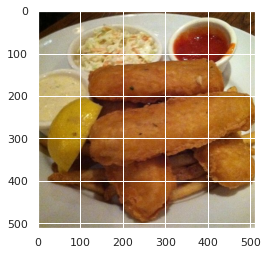

In [8]:
plt.imshow(image.load_img(np.random.choice(image_files)))

In [9]:
ptm = PretrainedModel(
    input_shape = IMAGE_SIZE + [3],
    weights = 'imagenet',
    include_top=False
)

58892288/58889256 [==============================] - 1s 0us/step


In [10]:
ptm.trainable =False

In [11]:
K = len(folders)
x = Flatten()(ptm.output)
x = Dense(K, activation='softmax')(x)

In [12]:
model = Model(inputs=ptm.input, outputs=x)

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [14]:
gen = ImageDataGenerator(
    rotation_range =20,
    width_shift_range =0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input
)

In [15]:
batch_size =128

train_generator = gen.flow_from_directory(
    train_path,
    shuffle=True,
    target_size = IMAGE_SIZE,
    batch_size = batch_size
)

valid_generator = gen.flow_from_directory(
    valid_path,
    target_size = IMAGE_SIZE,
    batch_size = batch_size
)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
model.compile(
    loss= 'categorical_crossentropy',
    optimizer='adam',
    metrics = ['accuracy']
)

In [17]:
r = model.fit_generator(
    train_generator,
    validation_data = valid_generator,
    epochs=5,
    steps_per_epoch = int(np.ceil(len(image_files)/batch_size)),
    validation_steps = int(np.ceil(len(valid_image_files)/batch_size))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
24/24 [==============================] - 1244s 52s/step - loss: 4.1516 - accuracy: 0.8687 - val_loss: 0.5700 - val_accuracy: 0.9720
Epoch 2/5
24/24 [==============================] - 57s 2s/step - loss: 0.6337 - accuracy: 0.9757 - val_loss: 0.6187 - val_accuracy: 0.9730
Epoch 3/5
24/24 [==============================] - 56s 2s/step - loss: 0.3157 - accuracy: 0.9803 - val_loss: 1.0143 - val_accuracy: 0.9630
Epoch 4/5
24/24 [==============================] - 56s 2s/step - loss: 0.1459 - accuracy: 0.9913 - val_loss: 0.6124 - val_accuracy: 0.9760
Epoch 5/5
24/24 [==============================] - 55s 2s/step - loss: 0.2224 - accuracy: 0.9857 - val_loss: 0.8019 - val_accuracy: 0.9710


In [18]:
#Cannot train due to hardware limitations (Google Colab allows at slow speed)

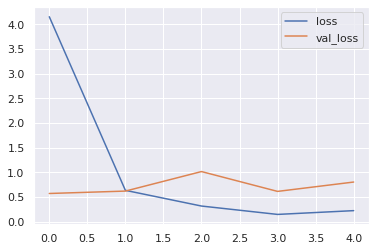

In [21]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

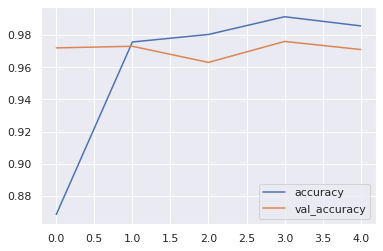

In [22]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()